## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
# mouse_metadata = mouse_metadata.drop_duplicates(['Mouse ID'])
study_results = pd.read_csv(study_results_path)
study_results = study_results.drop_duplicates(['Mouse ID','Timepoint'])



# Combine the data into a single dataset

merge = pd.merge(study_results,mouse_metadata,how='left',on=['Mouse ID'])

# Display the data table for preview
merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice.
mouse_num = len(merge)
mouse_num

1888

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge2 = merge.drop_duplicates(['Mouse ID'])
merge2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
244,t565,0,45.0,0,Capomulin,Female,20,17
245,i557,0,45.0,0,Capomulin,Female,1,24
246,m957,0,45.0,0,Capomulin,Female,3,19
247,f966,0,45.0,0,Capomulin,Male,16,17


In [24]:
# Checking the number of mice in the clean DataFrame.
real_mouse_num = len(merge2)
real_mouse_num

249

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugs = merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','std','median','var'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drugs

,mean,std,median,var
Drug Regimen,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764
Ceftamin,52.591172,6.268188,51.776157,39.290177
Infubinol,52.884795,6.567243,51.820584,43.128684
Ketapril,55.235638,8.279709,53.698743,68.553577
Naftisol,54.331565,8.134708,52.509285,66.173479
Placebo,54.033581,7.821003,52.288934,61.168083
Propriva,52.393463,6.568014,50.909965,43.138803
Ramicane,40.216745,4.846308,40.673236,23.486704
Stelasyn,54.233149,7.710419,52.431737,59.450562


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# wtf

## Bar and Pie Charts

In [63]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# wtf

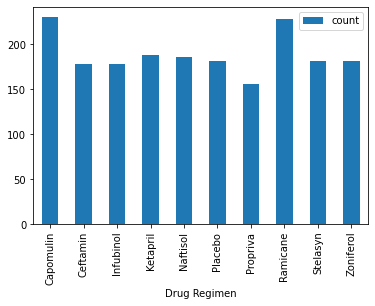

In [57]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugbar = merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['count'])
drugbar.plot(kind='bar')


In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


,count
Sex,
Female,124
Male,125


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000132681FB518>],
      dtype=object)

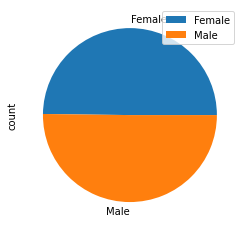

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genderpie = merge2.groupby('Sex')['Sex'].agg(['count'])
genderpie.plot(kind='pie',subplots=True)


## Quartiles, Outliers and Boxplots

In [119]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
finalt = merge.drop_duplicates('Mouse ID',keep='last')
index = 'Ramicane'

finalt.loc[finalt['Drug Regimen'] == index]  
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
422,w678,5,43.166373,0,Ramicane,Female,5,24
731,y449,15,44.183451,0,Ramicane,Male,19,24
1307,r921,30,43.419381,1,Ramicane,Female,5,25
1347,c458,30,38.342008,2,Ramicane,Female,23,20
1493,q610,35,36.561652,2,Ramicane,Female,18,21
1758,n364,45,31.095335,1,Ramicane,Male,4,17
1768,a411,45,38.407618,1,Ramicane,Male,3,22
1771,q597,45,45.220869,2,Ramicane,Male,20,25
1775,i334,45,36.374510,2,Ramicane,Female,8,20
1790,s508,45,30.276232,0,Ramicane,Male,1,17


In [81]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
